## Projet Data Mining



### Importation de données

In [ ]:
# Commençons par charger les bibliothèques que nous utiliserons plus tard pour le traitement des données
import sys
print(sys.path)

['/Users/mac/Downloads', '/Users/mac/opt/anaconda3/lib/python38.zip', '/Users/mac/opt/anaconda3/lib/python3.8', '/Users/mac/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/mac/opt/anaconda3/lib/python3.8/site-packages', '/Users/mac/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/mac/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/mac/.ipython']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
pd.options.mode.chained_assignment = None  
data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data', sep = ', ', engine = 'python')

In [ ]:
# Exploration de données
data

,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
0,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGT...
1,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGT...
2,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTA...
3,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGA...
4,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAA...
...,...,...,...
3184,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTC...
3185,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAG...
3186,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGG...
3187,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGC...


### Préprocessing

In [ ]:
data.columns =['Type', 'Nom_Gene', 'DNA']

In [ ]:
data.describe()


,Type,Nom_Gene,DNA
count,3189,3189,3189
unique,3,3177,3091
top,N,HUMMYLCA-DONOR-2559,TGACCTGATCTTTGCTCTCCCCCTGGCCAGTTGAGGA...
freq,1655,2,3


In [ ]:
# Les variantes de "valeurs" que peut prendre un nucléotide sont tirées de la description de l'ensemble de données d'origine
nucleotids =['A','T','G','C','D','N','R','S']
for i in nucleotids:
    data[i]=0

In [ ]:
# Indiquer le nombre de nucléotides de chaque type pour chaque brin d'ADN
for i in range(len(data)):
    for nc in nucleotids:
        data[nc][i] = data['DNA'][i].count(nc)


In [ ]:
# Déterminer quel codon stop est utilisé dans chaque séquence
stop_codones = ['TAA', 'TAG', 'TGA']
data['stop-code']='None'
for i in range(len(data)):
    if data['Type'][i]!= 'N':
        for j in range(len(stop_codones)): 
            stopcd = data['DNA'][i].find(stop_codones[j], 5, 59-5 )
            if stopcd != -1:
                if data['Type'][i]!='IE':
                    data['stop-code'][i]= stop_codones[j]
                    break;
                else:
                    priamidin = stopcd-15
                    pmd_start = min(data['DNA'][i].find('T', priamidin, stopcd), data['DNA'][i].find('C', priamidin, stopcd))
                    if (data['DNA'][i][pmd_start:stopcd].count('T')+data['DNA'][i][pmd_start:stopcd].count('C')+ data['DNA'][i][pmd_start:stopcd].count('D')+data['DNA'][i][pmd_start:stopcd].count('S')+data['DNA'][i][pmd_start:stopcd].count('N')>=3):
                        data['stop-code'][i]= stop_codones[j]
                        
                        break;

In [ ]:
data['stop-code'].describe()

count     3189
unique       4
top       None
freq      2084
Name: stop-code, dtype: object

In [ ]:
# Calculer la fréquence d'apparition des codes d'arrêt
st = data['stop-code'].unique()
stop_code_freq = [0 for i in range (len(st))]
for j in range(len(data)):
    for i in range (len(st)):
        if data['stop-code'][j]==st[i]:
            stop_code_freq[i]=stop_code_freq[i]+1
stop_code_freq

[448, 2084, 411, 246]

([<matplotlib.axis.XTick at 0x7fdd16cbcd90>,
 [Text(0, 0, 'TGA'), Text(1, 0, 'None'), Text(2, 0, 'TAA'), Text(3, 0, 'TAG')])

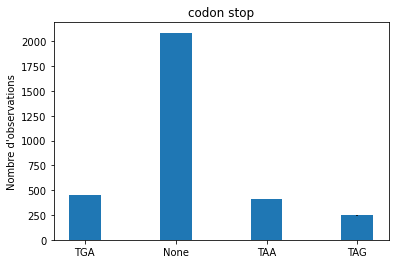

In [ ]:
# Tracer la fréquence d'apparition des codons stop.
stpcdnStd = (1,2,3,4)
ind = np.arange(len(stop_code_freq))   
width = 0.35      

p1 = plt.bar(ind, stop_code_freq, width, yerr=stpcdnStd)

plt.ylabel('Nombre d\'observations')
plt.title('codon stop')
plt.xticks(ind, st)

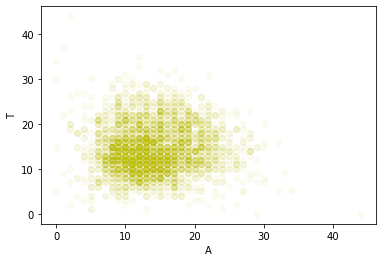

In [ ]:
# Graphique des observations du nombre de nucléotides d'Adénine et de Thymine dans des segments d'ADN de 60 nucléotides de long
plt.plot(data['A'], data['T'], 'o', alpha = 0.05,color = 'y')
plt.xlabel('A')
plt.ylabel('T')
pass

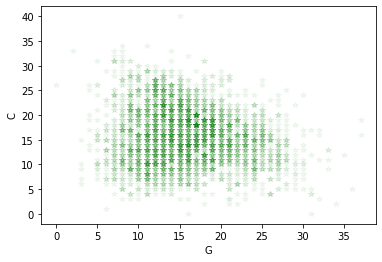

In [ ]:
# Graphique d'observations du nombre de nucléotides de cytosine et de guanine dans des segments d'ADN de 60 nucléotides de long
plt.plot(data['G'], data['C'], '*', alpha = 0.05, color = 'g')
plt.xlabel('G')
plt.ylabel('C')
pass

In [ ]:
# La fréquence moyenne d'occurrence de chaque nucléotide sur l'ensemble des données.
data.median(axis = 0)

A    13.0
T    14.0
G    15.0
C    15.0
D     0.0
N     0.0
R     0.0
S     0.0
dtype: float64

In [ ]:
#La corrélation entre le nombre de nucléotides de chaque type dans l'ensemble de données
data.corr()

,A,T,G,C,D,N,R,S
A,1.000000,0.021535,-0.317944,-0.587756,-0.019739,-0.031149,-0.013955,0.000190
T,0.021535,1.000000,-0.579498,-0.374441,-0.023986,-0.046290,0.018526,-0.011889
G,-0.317944,-0.579498,1.000000,-0.144013,0.030844,-0.042840,-0.012114,-0.012114
C,-0.587756,-0.374441,-0.144013,1.000000,0.005412,-0.017193,0.003826,0.019341
D,-0.019739,-0.023986,0.030844,0.005412,1.000000,-0.000601,-0.000444,-0.000444
N,-0.031149,-0.046290,-0.042840,-0.017193,-0.000601,1.000000,-0.000425,-0.000425
R,-0.013955,0.018526,-0.012114,0.003826,-0.000444,-0.000425,1.000000,-0.000314
S,0.000190,-0.011889,-0.012114,0.019341,-0.000444,-0.000425,-0.000314,1.000000


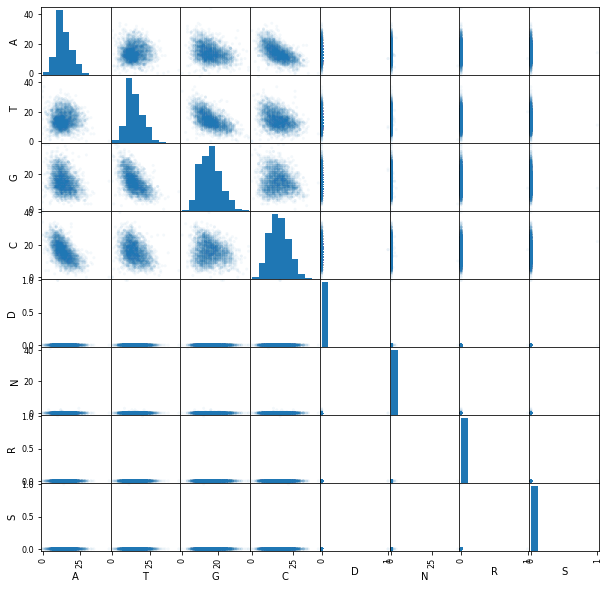

In [ ]:
# Résultats sous forme graphique en utilisant la fonction scatter_matrix de la bibliothèque pandas
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [ ]:
# Colonnes catégorielles -> Colonnes quantitatives
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object' and c!='Nom_Gene' and c!='DNA']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data_describe = data.describe(include = [object])
print(categorical_columns)
print(numerical_columns)
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)
data_nonbinary = pd.get_dummies(data[categorical_columns])
print(data_nonbinary.columns)

['Type', 'stop-code']
['A', 'T', 'G', 'C', 'D', 'N', 'R', 'S']
[] ['Type', 'stop-code']
Index(['Type_EI', 'Type_IE', 'Type_N', 'stop-code_None', 'stop-code_TAA',
       'stop-code_TAG', 'stop-code_TGA'],
      dtype='object')


In [ ]:
# La fréquence d'apparition d'un nucléotide dans un segment d'ADN
data_numerical = data[numerical_columns]
data_numerical

,A,T,G,C,D,N,R,S
0,8,4,21,27,0,0,0,0
1,12,7,27,14,0,0,0,0
2,4,17,23,16,0,0,0,0
3,10,10,14,26,0,0,0,0
4,21,6,18,15,0,0,0,0
...,...,...,...,...,...,...,...,...
3184,0,34,0,26,0,0,0,0
3185,18,4,22,16,0,0,0,0
3186,2,7,29,22,0,0,0,0
3187,28,17,5,10,0,0,0,0


In [ ]:
data_numerical.describe()

,A,T,G,C,D,N,R,S
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,13.946378,14.518031,15.749765,15.767012,0.000627,0.017560,0.000314,0.000314
std,5.009271,5.241538,5.483244,5.708572,0.025039,0.731745,0.017708,0.017708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,11.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,14.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,18.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000
max,44.000000,44.000000,37.000000,40.000000,1.000000,41.000000,1.000000,1.000000


In [ ]:
# Normalisation des valeurs
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,A,T,G,C,D,N,R,S
0,-1.187075,-2.006669,0.957505,1.967740,-0.025047,-0.023998,-0.017708,-0.017708
1,-0.388555,-1.434318,2.051748,-0.309537,-0.025047,-0.023998,-0.017708,-0.017708
2,-1.985594,0.473519,1.322253,0.040814,-0.025047,-0.023998,-0.017708,-0.017708
3,-0.787815,-0.861967,-0.319111,1.792565,-0.025047,-0.023998,-0.017708,-0.017708
4,1.408113,-1.625101,0.410384,-0.134361,-0.025047,-0.023998,-0.017708,-0.017708
...,...,...,...,...,...,...,...,...
3184,-2.784113,3.716842,-2.872344,1.792565,-0.025047,-0.023998,-0.017708,-0.017708
3185,0.809224,-2.006669,1.139879,0.040814,-0.025047,-0.023998,-0.017708,-0.017708
3186,-2.384854,-1.434318,2.416495,1.091865,-0.025047,-0.023998,-0.017708,-0.017708
3187,2.805522,0.473519,-1.960475,-1.010237,-0.025047,-0.023998,-0.017708,-0.017708


In [ ]:
data_numerical.describe()

,A,T,G,C,D,N,R,S
count,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03
mean,-2.164047e-16,3.770372e-17,1.324260e-15,-7.947199e-16,-1.529538e-16,9.459547e-16,2.586234e-16,2.586234e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.784113e+00,-2.769804e+00,-2.872344e+00,-2.761989e+00,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02
25%,-7.878149e-01,-6.711829e-01,-6.838588e-01,-6.598868e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02
50%,-1.889253e-01,-9.883182e-02,-1.367374e-01,-1.343614e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02
75%,6.095941e-01,6.643030e-01,5.927577e-01,7.415144e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02
max,5.999600e+00,5.624679e+00,3.875486e+00,4.245018e+00,3.991241e+01,5.600646e+01,5.645352e+01,5.645352e+01


In [ ]:
# Combiner les deux parties du tableau: quantitatif et catégoriel en un seul
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data

,A,T,G,C,D,N,R,S,Type_EI,Type_IE,Type_N,stop-code_None,stop-code_TAA,stop-code_TAG,stop-code_TGA
0,-1.187075,-2.006669,0.957505,1.967740,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1
1,-0.388555,-1.434318,2.051748,-0.309537,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1
2,-1.985594,0.473519,1.322253,0.040814,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,1,0,0,0
3,-0.787815,-0.861967,-0.319111,1.792565,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1
4,1.408113,-1.625101,0.410384,-0.134361,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-2.784113,3.716842,-2.872344,1.792565,-0.025047,-0.023998,-0.017708,-0.017708,0,0,1,1,0,0,0
3185,0.809224,-2.006669,1.139879,0.040814,-0.025047,-0.023998,-0.017708,-0.017708,0,0,1,1,0,0,0
3186,-2.384854,-1.434318,2.416495,1.091865,-0.025047,-0.023998,-0.017708,-0.017708,0,0,1,1,0,0,0
3187,2.805522,0.473519,-1.960475,-1.010237,-0.025047,-0.023998,-0.017708,-0.017708,0,0,1,1,0,0,0


In [ ]:
data.describe()

,A,T,G,C,D,N,R,S,Type_EI,Type_IE,Type_N,stop-code_None,stop-code_TAA,stop-code_TAG,stop-code_TGA
count,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3.189000e+03,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,-2.164047e-16,3.770372e-17,1.324260e-15,-7.947199e-16,-1.529538e-16,9.459547e-16,2.586234e-16,2.586234e-16,0.240201,0.240828,0.518971,0.653496,0.128881,0.077140,0.140483
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.427272,0.427653,0.499718,0.475931,0.335120,0.266856,0.347542
min,-2.784113e+00,-2.769804e+00,-2.872344e+00,-2.761989e+00,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.878149e-01,-6.711829e-01,-6.838588e-01,-6.598868e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.889253e-01,-9.883182e-02,-1.367374e-01,-1.343614e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,6.095941e-01,6.643030e-01,5.927577e-01,7.415144e-01,-2.504701e-02,-2.399793e-02,-1.770813e-02,-1.770813e-02,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5.999600e+00,5.624679e+00,3.875486e+00,4.245018e+00,3.991241e+01,5.600646e+01,5.645352e+01,5.645352e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Créer target Y
X = data
Y = [0 for i in range(len(data))]
for i in range(len(data)):
    if data['Type_EI'][i]==1:
        Y[i]=0
    if data['Type_IE'][i]==1:
        Y[i]=1
    if data['Type_N'][i]==1:
        Y[i]=2
feature_names = X.columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.25, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2391 798


In [ ]:
X_test

,A,T,G,C,D,N,R,S,Type_EI,Type_IE,Type_N,stop-code_None,stop-code_TAA,stop-code_TAG,stop-code_TGA
403,1.607743,0.473519,0.045636,-1.886113,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,1,0,0
453,-1.586334,-0.861967,0.592758,1.617390,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1
2534,-1.386704,0.855087,0.045636,0.391164,-0.025047,-0.023998,-0.017708,-0.017708,0,0,1,1,0,0,0
13,0.609594,-1.243534,2.051748,-1.360587,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,1,0
45,-0.588185,-0.861967,2.051748,-0.659887,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1.208484,0.664303,-0.683859,-1.010237,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,1,0,0
880,0.210334,-0.480399,-0.501485,0.741514,-0.025047,-0.023998,-0.017708,-0.017708,0,1,0,0,0,0,1
501,-0.388555,-0.098832,0.410384,0.040814,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1
119,-0.388555,-1.434318,1.687000,0.040814,-0.025047,-0.023998,-0.017708,-0.017708,1,0,0,0,0,0,1


### Modeling

In [ ]:
# Appliquer KNN avec n_neighbors=3
from sklearn import neighbors
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print (1 - metrics.accuracy_score(y_test, y_test_pred))
#L'erreur de classification était d'environ 1% 

0.0012531328320801727


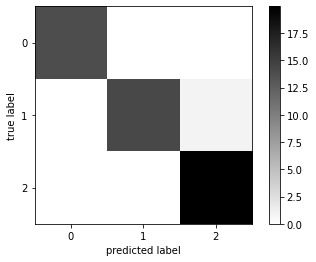

In [ ]:
M = metrics.confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [ ]:
# Voir comment l'erreur sur les échantillons de test et d'apprentissage changera 
#avec une augmentation du nombre de voisins pour le modèle
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

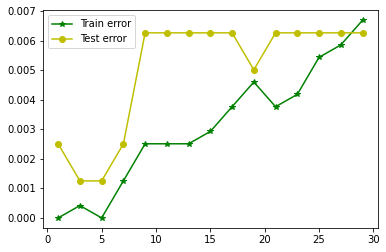

In [ ]:
plt.plot(kk, err_train, '*-g', label = 'Train error')
plt.plot(kk, err_test,  'o-y', label = 'Test error')    
plt.legend(loc = 2)

In [ ]:
# Appliquer SVM
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_test, y_test)

SVC(kernel='linear')

In [ ]:
#Examiner l'erreur de classification lors de l'utilisation de ce modèle
y_test_pred = svc_model.predict(X_test)
np.mean(y_test != y_test_pred)

# l'erreur est de 0%, donc la matrice de confusion dans ce cas n'est pas si intéressante

0.0

In [ ]:
# Appliquer ExtraTreesClassifier
# Entraîner le modèle pour 15 arbres
from sklearn.ensemble import ExtraTreesClassifier
rf_model = ExtraTreesClassifier(n_estimators=15)
rf_model.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=15)

In [ ]:
err_train = np.mean(y_train != rf_model.predict(X_train))
err_test = np.mean(y_test != rf_model.predict(X_test))
print(err_train, err_test)

0.0 0.0


In [ ]:
kk = range(10, 30, 1)
err_train = []
err_test = []
err_general = []

for k in kk:
    model =rf_model = ExtraTreesClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
    err_general.append(np.mean(model.predict(X) != Y))

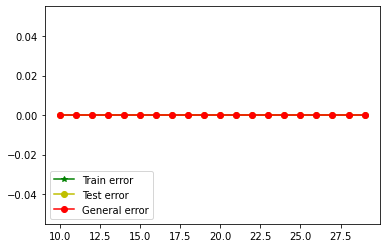

In [ ]:
plt.plot(kk, err_train, '*-g', label = 'Train error')
plt.plot(kk, err_test,  'o-y', label = 'Test error') 
plt.plot(kk, err_general, 'o-r', label = 'General error')
plt.legend(loc = 3)

In [ ]:
# Appliquer PCA
from sklearn.decomposition import PCA
pca = PCA(whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

[[-9.50889630e-01  5.12898794e-01 -5.27473656e-02 ... -2.30721912e+00
  -2.73250409e+00 -1.94133066e+00]
 [-2.57351515e-01 -1.29081830e+00 -9.47709461e-02 ... -2.43033181e+00
  -1.66417830e+00 -8.42170667e-01]
 [ 7.08373501e-01 -8.88618064e-01  3.73813023e-03 ...  7.40917593e-02
   9.06178850e-01  1.75849162e-01]
 ...
 [-9.36458283e-01  1.68522863e+00 -8.95313747e-02 ...  1.45713164e+00
  -1.66417830e+00  4.34047573e+00]
 [-1.23021754e+00  6.63766594e-02  1.35918160e-03 ... -5.14805780e+00
  -2.33706452e+00 -5.64322095e+00]
 [ 1.43198535e+00  1.02366868e-01 -6.71107838e-02 ...  6.21529692e+00
   8.26451972e-01  1.02018157e+00]]


In [ ]:
len(X_train.columns)

15

In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_test, y_test)
y_test_pred = svc_model.predict(X_test)
np.mean(y_test != y_test_pred)

0.0